# Coding a GAN


In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

# Download MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Code for visualization
def visualize_row(images, img_width=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a column
    in a plot, using `cmap` to map from numbers to colors.
    """
    im = np.reshape(images, [-1, img_width])
    plt.figure()
    plt.axis('off')
    plt.imshow(im, cmap=cmap)
    plt.show()


def variables_from_scope(scope_name):
    """
    Returns a list of all variables in a given scope. This is useful when
    you'd like to back-propagate only to weights in one part of the network
    (in our case, the generator or the discriminator).
    """
    return tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=scope_name)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


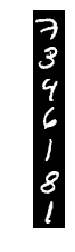

In [2]:
visualize_row(mnist.train.images[:7])

In [44]:
def generator(gen_in):
    h_G1 = tf.layers.dense(gen_in, 256, activation=tf.nn.relu)
    fake_X = tf.layers.dense(h_G1, 784, activation=tf.sigmoid)
    
    return fake_X

def discriminator(d_in):
    h_D1 = tf.layers.dense(d_in, 256, name="D1", activation=tf.nn.relu)
    out = tf.layers.dense(h_D1, 1, name="D2", activation=tf.sigmoid)
    
    return out

In [53]:
simple = False

# Number of random numbers given to generate the image
# Ideal: the dimensionality of the image manifold
z_dimension = 32

tf.reset_default_graph()

# Placeholders
# Random input sample
z = tf.placeholder(tf.float32, [None, z_dimension])
# Real input: 784 because working with MNIST

real_X = tf.placeholder(tf.float32, [None, image_dim])

if simple:
    # Note: This code is buggy. Something makes the loss negative and it stops getting better.
    # Use the other version instead.
    
    image_dim = 784
    
    ## G's variables
    inner_layer_dim = 256 # smaller = faster & less accurate
    W_G1 = tf.Variable(tf.truncated_normal([z_dimension, inner_layer_dim]))
    b_G1 = tf.Variable(tf.zeros([inner_layer_dim]))

    W_G2 = tf.Variable(tf.truncated_normal([inner_layer_dim, image_dim]))
    b_G2 = tf.Variable(tf.zeros([image_dim]))

    ## D's variables
    W_D1 = tf.Variable(tf.truncated_normal([image_dim, inner_layer_dim]))
    b_D1 = tf.Variable(tf.zeros([inner_layer_dim]))
    # output dim = 1 because you're outputing one probability
    W_D2 = tf.Variable(tf.truncated_normal([inner_layer_dim, 1]))
    b_D2 = tf.Variable(tf.zeros([1]))


    ## Discriminator on real images
    # use sigmoid to get a probability
    h_D1_real = tf.nn.relu(tf.matmul(real_X, W_D1) + b_D1)
    D_on_real = tf.sigmoid(tf.matmul(h_D1_real, W_D2) + b_D2)
    
    ## Generator
    # use sigmoid to get black/white output
    h_G1 = tf.nn.relu(tf.matmul(z, W_G1) + b_G1)
    fake_X = tf.sigmoid(tf.matmul(h_G1, W_G2) + b_G2)

    ## Discriminator on fake images
    # use sigmoid to get a probability
    h_D1_fake = tf.nn.relu(tf.matmul(fake_X, W_D1) + b_D1)
    D_on_fake = tf.sigmoid(tf.matmul(h_D1_fake, W_D2) + b_D2)

    ## Loss for D
    D_loss = -tf.reduce_mean(tf.concat([tf.log(D_on_real + 1e-10), 
                                        tf.log(1. - D_on_fake + 1e-10)], axis=0))

    ## Loss for G
    G_loss = -tf.reduce_mean(tf.log(D_on_fake + 1e-10))

    ## Training operations
    optimize_D = tf.train.AdamOptimizer().minimize(
        D_loss, var_list=[W_D1, b_D1, W_D2, b_D2])
    optimize_G = tf.train.AdamOptimizer().minimize(
        G_loss, var_list=[W_G1, b_G1, W_G2, b_G2])

else:
    # Generator
    with tf.variable_scope("generator") as scope:
        fake_X = generator(z)
        
    # Discriminator on real
    with tf.variable_scope("discriminator") as scope:
        D_on_real = discriminator(real_X)
        scope.reuse_variables()
        D_on_fake = discriminator(fake_X)

    ## Loss for D
    D_loss = -tf.reduce_mean(tf.concat([tf.log(D_on_real + 1e-10), 
                                        tf.log(1. - D_on_fake + 1e-10)], axis=0))

    ## Loss for G
    G_loss = -tf.reduce_mean(tf.log(D_on_fake + 1e-10))
    
    ## Training operations
    optimize_D = tf.train.AdamOptimizer().minimize(
        D_loss, var_list=variables_from_scope("discriminator"))
    optimize_G = tf.train.AdamOptimizer().minimize(
        G_loss, var_list=variables_from_scope("generator"))


In [54]:
#tf.reset_default_graph()
g = tf.get_default_graph()
g.get_operations()

[<tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform/shape' type=Const>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform/min' type=Const>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform/max' type=Const>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform/sub' type=Sub>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform/mul' type=Mul>,
 <tf.Operation 'generator/dense/kernel/Initializer/random_uniform' type=Add>,
 <tf.Operation 'generator/dense/kernel' type=VariableV2>,
 <tf.Operation 'generator/dense/kernel/Assign' type=Assign>,
 <tf.Operation 'generator/dense/kernel/read' type=Identity>,
 <tf.Operation 'generator/dense/bias/Initializer/zeros' type=Const>,
 <tf.Operation 'generator/dense/bias' type=VariableV2>,

iter 0, loss is 0.4226527810096741


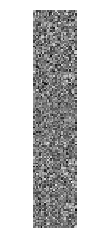

iter 500, loss is 0.005509256850928068


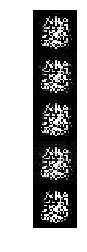

iter 1000, loss is 0.02193845994770527


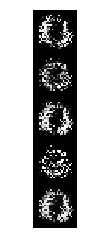

iter 1500, loss is 0.0059129768051207066


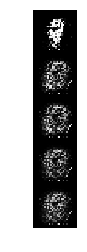

iter 2000, loss is 0.007992841303348541


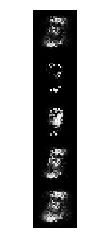

iter 2500, loss is 0.007573895622044802


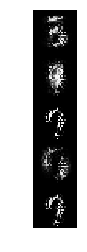

iter 3000, loss is 0.027240121737122536


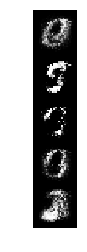

iter 3500, loss is 0.037303902208805084


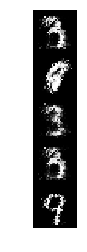

iter 4000, loss is 0.02116134576499462


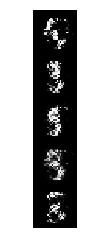

iter 4500, loss is 0.047565948218107224


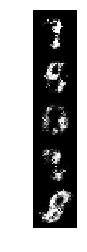

iter 5000, loss is 0.03915683180093765


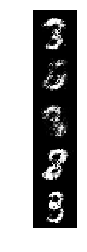

iter 5500, loss is 0.029919011518359184


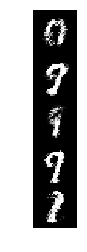

iter 6000, loss is 0.10752535611391068


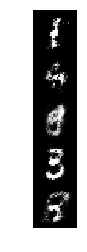

iter 6500, loss is 0.1942729949951172


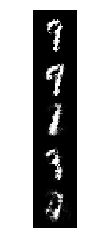

iter 7000, loss is 0.2852596640586853


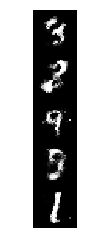

iter 7500, loss is 0.22062115371227264


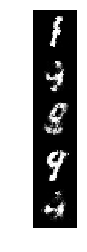

iter 8000, loss is 0.1561383455991745


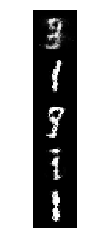

iter 8500, loss is 0.2664322555065155


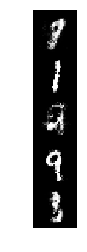

iter 9000, loss is 0.4363383948802948


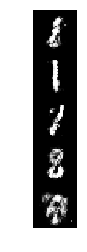

iter 9500, loss is 0.1446652114391327


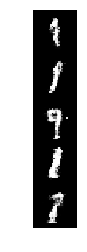

iter 10000, loss is 0.25219088792800903


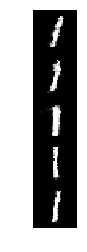

iter 10500, loss is 0.27440863847732544


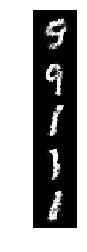

iter 11000, loss is 0.23394787311553955


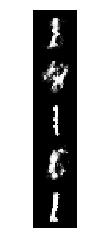

iter 11500, loss is 0.16852779686450958


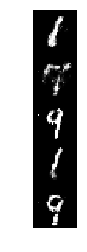

iter 12000, loss is 0.2465026080608368


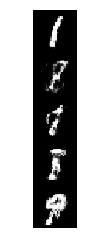

iter 12500, loss is 0.23125825822353363


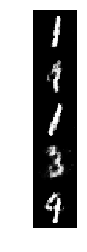

iter 13000, loss is 0.2745504081249237


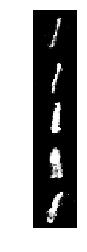

iter 13500, loss is 0.17628724873065948


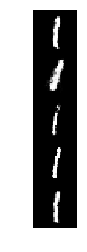

iter 14000, loss is 0.1591590791940689


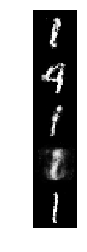

iter 14500, loss is 0.2017078548669815


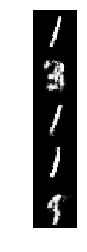

iter 15000, loss is 0.22295446693897247


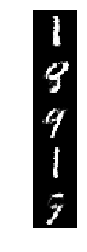

iter 15500, loss is 0.3366210460662842


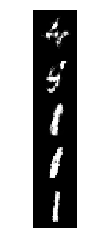

iter 16000, loss is 0.3056342601776123


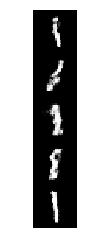

iter 16500, loss is 0.2683663070201874


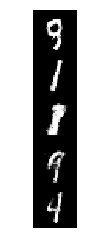

iter 17000, loss is 0.24276195466518402


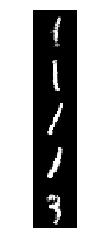

iter 17500, loss is 0.3298853933811188


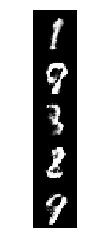

iter 18000, loss is 0.20503927767276764


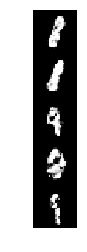

iter 18500, loss is 0.18357378244400024


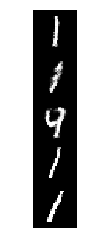

iter 19000, loss is 0.2748340666294098


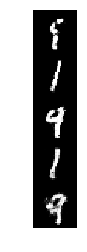

iter 19500, loss is 0.2648307681083679


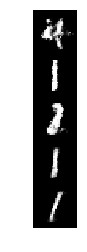

iter 20000, loss is 0.27681827545166016


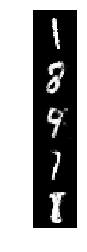

iter 20500, loss is 0.21687005460262299


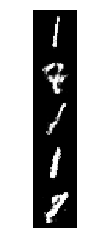

iter 21000, loss is 0.2613663971424103


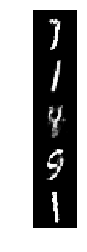

iter 21500, loss is 0.2348119020462036


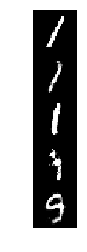

iter 22000, loss is 0.24295789003372192


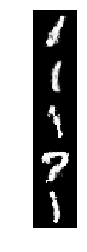

iter 22500, loss is 0.22643040120601654


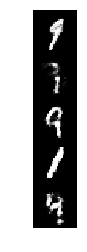

iter 23000, loss is 0.3678126633167267


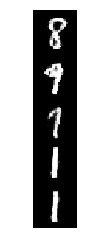

iter 23500, loss is 0.20015226304531097


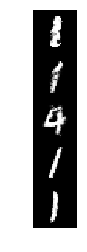

iter 24000, loss is 0.26551878452301025


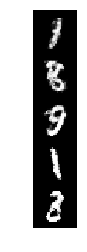

iter 24500, loss is 0.18729467689990997


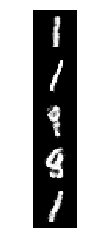

In [55]:
## Train

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

batch_size = 50

def next_feed_dict():
    return {
        z: np.random.uniform(-1, 1, [batch_size, z_dimension]),
        real_X: mnist.train.next_batch(batch_size)[0]
    }

for i in range(25000):
    sess.run(optimize_D, feed_dict=next_feed_dict())
    sess.run(optimize_G, feed_dict=next_feed_dict())
    
    if (i % 500) == 0:
        fake_images, loss = sess.run([fake_X, D_loss], 
                                     feed_dict = next_feed_dict())
        print("iter {0}, loss is {1}".format(i, loss))
        visualize_row(fake_images[:5])